## 10.21作业
   <font color=ff0000> 截止日期：10.23(周五)10:00 </font>

### 第一部分：基础练习

#### 1.1 请完成代码，实现输入任意多个空格分隔的浮点数，并打印输出这些浮点数的和


参考：
```
a, b = map(int, input('输入空格分隔的两个数：').split())
print(a+b)
```

提示：同时赋值两个变量的这个语法叫 Tuple Unpacking




In [4]:
def do_sum(inp):
    return sum(float(x) for x in inp.split(' '))

# 下面的语句用来检验 do_sum 的正确性
assert do_sum('1 2') == 3
assert do_sum('1 2 3 4.6 5 -1.1') == 14.5
assert do_sum('-123') == -123
print('Test passed!')

Test passed!


#### 1.2 定义一个函数func(listinfo) listinfo:为列表，listinfo = [133, 88, 24, 33, 232, 44, 11, 44]，剔除列表中大于100的奇数

In [2]:
def func(listinfo):
    return list(filter(lambda x:not (x>100 and x%2==1),listinfo))
print (func([133, 88, 24, 33, 232, 44, 11, 44]))

[88, 24, 33, 232, 44, 11, 44]


#### 1.3 牛顿迭代法
以方程：$x^3-0.2x^2-0.2x-1.2=0$为例，编写程序求该方程的根,精度为0.00000001

这里精度是为了控制迭代，而不是需要保留小数点后8位

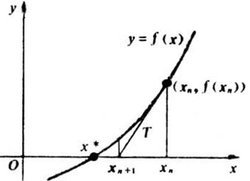

In [3]:
def f(x):
    return x**3-0.2*x**2-0.2*x-1.2

def df(x):
    return 3*x**2-0.4*x-0.2
def newt(iter, x0):
    nx=0
    while True:
        iter+=1
        nx=x0-f(x0)/df(x0)
        if abs(nx-x0)<=1e-8:
            break
        x0=nx
    return iter,x0
print("%d rounds of iteration. Result : %f" % newt(0, 1.7))

6 rounds of iteration. Result : 1.200000


#### 1.4 设计一个decorator，它可作用于任何函数上，并打印该函数的执行时间 
（提示：`time.time()`会返回当前时间）

In [7]:
import time
def decorator(func):
    def inner(*args, **kwargs):
        a=time.time()
        func()
        b=time.time()
        print(b-a)
    return inner

# 请 @decorator下方定义一个自己的函数 def my_func(...)
@decorator
def my_func():
    sm=0
    for i in range(10000000):
        sm+=i
my_func()
# 并在这儿运行 my_func(...)

0.3305022716522217


#### 1.5 用匿名函数改造下面的代码

```
def is_odd(n):
    return n % 2 == 1

L = list(filter(is_odd, range(1, 20)))
print(L)
```

In [8]:
L = list(filter(lambda x:x%2, range(1, 20)))
print(L)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


### 第二部分：进阶练习

#### 2.1 高阶函数

实现函数`f`, 使得在调用`f(a)(b)`的时候返回`a+b`的结果。
提示：函数`f`返回另一个函数。

你也可以考虑怎么改进可以使得加数可变，如实现通过`f(a)(b)(c)(d)`计算`a+b+c+d`。（提示：通过传递可变参数，并判断是返回加法计算结果还是另一个函数）

In [9]:
def f(x):
    return lambda a:a+x
print(f(7)(9))
print(f("hello,")("world!"))

16
world!hello,


#### 2.2 给定一个数组nums找最长递增子序列长度（要求用装饰器实现动态规划算法的记忆存储）

In [12]:
#用装饰器实现动态规划算法的记忆存储
def memo(func):
    f=[-1]*10000
    def qwq(cur):
        if f[cur]==-1:
            f[cur]=func(cur)
        return f[cur]
    return qwq
def rec_lis(seq):
    @memo
    def L(cur): # 动态规划
        res = 1
        for pre in range(cur):
            if seq[pre] <= seq[cur]:
                res = max(res, 1 + L(pre))
        return res
    return max(L(i) for i in range(len(seq)))

rec_lis([4,9,8,7,3,1,3,5,6,7,8])

6

#### 2.3 从开发的代码库中得到一组数据，表示每个文件的代码变更情况

    {'login.py': 'a 8 d 2 u 3', 'order.py': 'a 15 d 0 u 34', 'info.py': 'a 1 d 20 u 5'}

其中 a表示新增行数，d表示删除行数，u表示修改行数。login.py的变更行数为13

要求：统计出每个文件的变更行数，要求使用try...except...来发现格式错误

In [ ]:
data={'login.py': 'a 8 d 2 u 3', 'order.py': 'a 15 d 0 u 34', 'info.py': 'a 1 d 20 u 5', 'tmp.py' : 'asdfg'}
for k,v in data.items():
    sum=0
    for x in v.split(' '):
        # 在这里补充
        # 要求使用try...except...来发现格式错误
    print('文件：%s,共变更%d行'%(k,sum))

#### 2.4 创建一个名为PkuClass 的类， 其方法__init__( ) 设置两个属性：student_num 和teacher_num 。 创建一个名为describe_class( ) 的方法， 能够返回student_num 和teacher_num。创建一个quit_class()方法，能够减去相应的退课学生数。

In [ ]:
class PkuClass:
    # 补充完成该类 
    def __init__(self,s_n,t_n):
        raise NotImplementedError
    
pkuclass = PkuClass(100,1)  
pkuclass.quit(10)
assert pkuclass.describe_class() == (90,1)

#### 2.5 继承2.4的PkuClass类实现一个PythonClass，修改相应默认函数,使得直接print该类就能在屏幕中打出该课程的学生人数和教师人数(输出格式为：该课共有学生x人,老师y人)